### We are going to split the data in 90-10% correctly based on the date

In [2]:
import pandas as pd

#### Import Files

In [3]:
train_data = pd.read_csv('./data/663e2b6d54457_train_data_with_samplefeatures.csv')
match_data = pd.read_csv('./data/664389efa0868_match_level_scorecard.csv')
bowlers_data = pd.read_csv('./data/663e2b2c60743_bowler_level_scorecard.csv')
batsman_data = pd.read_csv('./data/663e2b548c98c_batsman_level_scorecard.csv')
test_data = pd.read_csv('./data/6644a1e287df6_test_data_with_samplefeatures.csv')

#### Sort all data by Dates

In [4]:
train_data = train_data.sort_values('match_dt')
match_data = match_data.sort_values('match_dt')
bowlers_data = bowlers_data.sort_values('match_dt')
batsman_data = batsman_data.sort_values('match_dt')
test_data = test_data.sort_values('match_dt')

In [5]:
test_data

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
269,8887752,Sy Tr,33963,7572123.0:1749075.0:6718802.0:5788320.0:753465...,Me Rs,33942,5406540.0:37351.0:46794.0:2336473.0:7534687.0:...,Me Rs,field,Ds Sm Me,...,2022-01-08,night match,Bg Bh Le,2021/22,8252,0.333333,1.487805,171.066667,100.00,161.750000
80,8887780,Ht Hs,33928,5843200.0:4223883.0:2340372.0:6381962.0:216159...,Sy Tr,33963,7572123.0:1749075.0:6718802.0:5788320.0:753465...,Ht Hs,bat,Me Ct Gd,...,2022-01-10,day match,Bg Bh Le,2021/22,440,1.800000,1.000000,168.000000,50.00,158.777778
251,8887794,Ae Ss,33914,4239038.0:5492318.0:5469008.0:1635773.0:555425...,Be Ht,33921,7870043.0:2286472.0:2336613.0:3651472.0:578676...,Ae Ss,bat,Be Ct Gd Wa Be,...,2022-01-12,night match,Bg Bh Le,2021/22,1476,0.750000,1.000000,160.533333,33.33,164.000000
48,8887801,Ht Hs,33928,5843200.0:4223883.0:1611364.0:2161599.0:624925...,Sy Tr,33963,7572123.0:1749075.0:6718802.0:5788320.0:753465...,Ht Hs,bat,Ds Sm Me,...,2022-01-13,day/night match,Bg Bh Le,2021/22,8252,1.600000,1.000000,168.000000,50.00,161.750000
155,8887745,Ae Ss,33914,4239038.0:5056134.0:2082499.0:1635773.0:546900...,Me Ss,33949,4003390.0:2275195.0:2669316.0:2275097.0:390107...,Me Ss,field,Ae Ol,...,2022-01-15,day match,Bg Bh Le,2021/22,930,0.692308,0.512195,160.533333,33.33,158.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,9615073,Wt Is,41,4690258.0:2436405.0:4230127.0:4069666.0:469018...,Ed,20,4685568.0:2162782.0:6282856.0:4640824.0:282732...,Ed,field,Nl Ct Sm St Gs Ga,...,2023-12-14,day match,Ed tr of Wt Is,2023/24,7930,0.923077,2.904762,169.600000,60.00,159.400000
188,9615087,Ed,20,4685568.0:2162782.0:6282856.0:2827327.0:638196...,Wt Is,41,4690258.0:2436405.0:4230127.0:4069666.0:640180...,Wt Is,field,Bn La Sm Ta Td,...,2023-12-19,day/night match,Ed tr of Wt Is,2023/24,14300,0.800000,1.000000,174.266667,60.00,151.625000
135,9702748,Me Ss,33949,5406540.0:7960994.0:2669316.0:2275195.0:227509...,Sy Tr,33963,3507090.0:1749075.0:6718802.0:7534652.0:233538...,Me Ss,bat,Ln Ss Ol Ay,...,2023-12-23,day/night match,Bg Bh Le,2023/24,6579,0.692308,0.047619,159.333333,50.00,197.000000
264,9702776,Be Ht,33921,8561342.0:1626526.0:7870043.0:5056134.0:208340...,Sy Tr,33963,3507090.0:1749075.0:6718802.0:7534652.0:233538...,Be Ht,bat,Be Ct Gd Wa Be,...,2023-12-27,night match,Bg Bh Le,2023/24,1476,0.461538,3.857143,163.800000,60.00,163.300000


In [6]:
train_data

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
616,8887675,Be Ht,33921,2286472.0:3114803.0:3651472.0:5786766.0:762026...,Ht Hs,33928,1611364.0:4223883.0:2161599.0:6381962.0:234037...,Be Ht,33921,Ht Hs,...,2022-01-01,day/night match,Bg Bh Le,2021/22,6348,0.583333,0.672131,166.933333,0.0,162.333333
298,8887689,Ph Ss,33935,3507090.0:3535783.0:1626526.0:1798705.0:350188...,Me Ss,33949,4003390.0:7960994.0:2275195.0:4393374.0:390107...,Ph Ss,33935,Ph Ss,...,2022-01-02,day/night match,Bg Bh Le,2021/22,2932,1.222222,1.327869,178.733333,100.0,NaN
902,8887703,Me Ss,33949,2340519.0:7880018.0:4393374.0:2275195.0:390107...,Me Rs,33942,5406540.0:37351.0:46794.0:2336473.0:7534687.0:...,Me Rs,33942,Me Ss,...,2022-01-03,night match,Bg Bh Le,2021/22,440,0.400000,41.000000,171.066667,50.0,162.687500
476,8887717,Ht Hs,33928,4223883.0:1611364.0:2161599.0:2340372.0:584320...,Ae Ss,33914,4239038.0:5492318.0:5056134.0:1635773.0:546900...,Ae Ss,33914,Ae Ss,...,2022-01-05,night match,Bg Bh Le,2021/22,930,1.000000,61.000000,173.333333,100.0,161.045455
604,8887731,Be Ht,33921,3062149.0:8415665.0:3585350.0:5786766.0:153920...,Me Rs,33942,5406540.0:37351.0:46794.0:2336473.0:7537067.0:...,Me Rs,33942,Me Rs,...,2022-01-06,night match,Bg Bh Le,2021/22,3961,0.363636,1.952381,167.000000,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,9717504,Nw Zd,48,6718326.0:4381761.0:2672214.0:5764576.0:306995...,Bh,188,3758565.0:2104332.0:4403419.0:3056752.0:693023...,Bh,188,Bh,...,2023-12-27,night match,Bh tr of Nw Zd,2023/24,3184,1.000000,0.603960,177.400000,80.0,159.666667
21,9866373,Oo,18360,2319638.0:8444855.0:4172706.0:7907444.0:631714...,Wn,18570,9036516.0:8271969.0:3913447.0:9523954.0:835478...,Wn,18570,Oo,...,2023-12-28,day/night match,Sr Sh,2023/24,5382,1.400000,1.487805,165.733333,0.0,NaN
90,9702783,Ht Hs,33928,1611364.0:5843200.0:5716402.0:3890963.0:194364...,Me Ss,33949,5406540.0:2275195.0:2275097.0:3901078.0:796099...,Me Ss,33949,Me Ss,...,2023-12-28,night match,Bg Bh Le,2023/24,6348,1.444444,1.000000,175.933333,40.0,152.785714
614,9702790,Ae Ss,33914,4239038.0:2161599.0:2286472.0:5469008.0:368195...,Me Rs,33942,4003390.0:2654014.0:8176356.0:46794.0:1635773....,Me Rs,33942,Ae Ss,...,2023-12-29,night match,Bg Bh Le,2023/24,8252,0.529412,1.000000,162.133333,40.0,158.500000


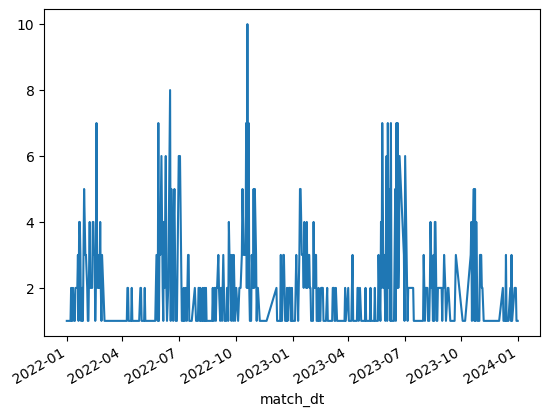

In [7]:
## Plot the dates of the matches by the number of matches played on that day
import matplotlib.pyplot as plt
import seaborn as sns
train_data['match_dt'] = pd.to_datetime(train_data['match_dt'])
train_data['match_dt'].value_counts().sort_index().plot()
plt.show()

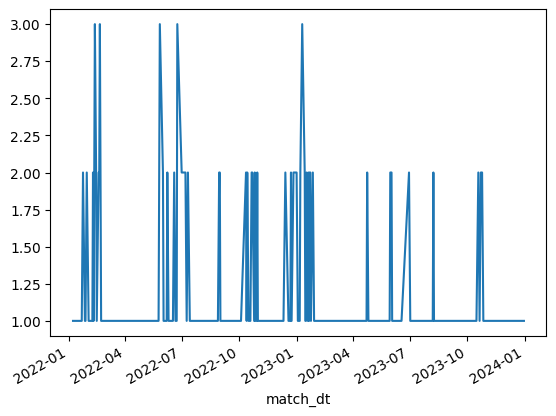

In [8]:
## Similar plot for the test data
test_data['match_dt'] = pd.to_datetime(test_data['match_dt'])
test_data['match_dt'].value_counts().sort_index().plot()
plt.show()

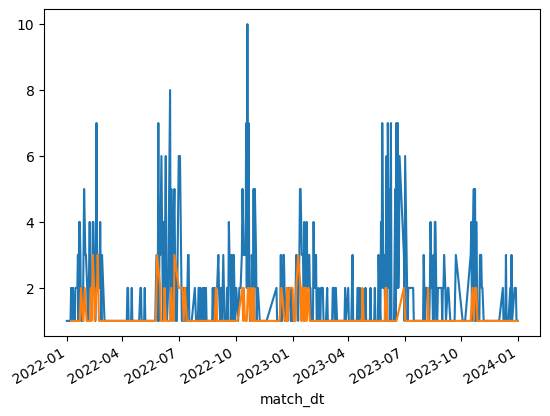

In [9]:
train_data['match_dt'].value_counts().sort_index().plot()
test_data['match_dt'].value_counts().sort_index().plot()
plt.show()


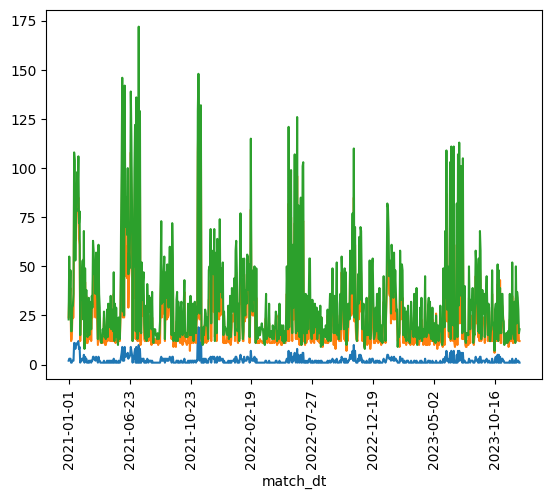

In [10]:
match_data['match_dt'].value_counts().sort_index().plot()
bowlers_data['match_dt'].value_counts().sort_index().plot()
batsman_data['match_dt'].value_counts().sort_index().plot()
plt.xticks(rotation=90)
plt.show()

In [11]:
train_data.iloc[0]

match id                                                               8887675
team1                                                                    Be Ht
team1_id                                                                 33921
team1_roster_ids             2286472.0:3114803.0:3651472.0:5786766.0:762026...
team2                                                                    Ht Hs
team2_id                                                                 33928
team2_roster_ids             1611364.0:4223883.0:2161599.0:6381962.0:234037...
winner                                                                   Be Ht
winner_id                                                                33921
toss winner                                                              Ht Hs
toss decision                                                            field
venue                                                                 Be Ol Ht
city                                                

In [12]:
batsman_id = 2286472

## Show all the batsman_match_id for the batsman_id before 2022-01-01
x = batsman_data[(batsman_data['batsman_id'] == batsman_id) & (batsman_data['match_dt'] < '2022-01-01')]        

## Note down the match_if from the above data and print the match level data for that match_id
match_id_all = x['match id'].unique()

match_data_list = [match_data[match_data['match id'] == match_id] for match_id in match_id_all]

# Concatenate all match level data into a single DataFrame
y = pd.concat(match_data_list, ignore_index=True)

In [13]:
x

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,...,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
152,8587970,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,0.0,0.0,2,30,16,1.5,...,T Sa,O Ds,8193310.0,AUS:Right-hand bat:Legbreak:,0.0,0.0,187.50,3.0,2.0,2021-01-04
193,8587858,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,48,23,1.4,...,GJ Ml,NaN,2275195.0,AUS:Right-hand bat:Right-arm offbreak:,0.0,1.0,208.70,3.0,4.0,2021-01-07
382,8587998,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,56,44,2.1,...,CR Be,JC Sk,3200756.0,WI:Right-hand bat:Right-arm fast-medium:,0.0,0.0,127.27,7.0,1.0,2021-01-10
655,8587914,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,50,40,1.6,...,KW Rn,NaN,1905847.0,AUS:Right-hand bat:Right-arm fast-medium:,0.0,0.0,125.00,4.0,1.0,2021-01-14
1144,8587879,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,27,16,1.4,...,Fd Ad,JP Is,1684276.0,AUS:Right-hand bat:Legbreak googly:,0.0,0.0,168.75,2.0,2.0,2021-01-19
1177,8588026,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,17,9,1.3,...,WA Ar,RJ Gn,6718844.0,AUS:Right-hand bat:Right-arm fast:,0.0,0.0,188.89,2.0,1.0,2021-01-21
1250,8587949,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,52,30,1.1,...,Z Es,J Fk,7620297.0,AUS:Right-hand bat:Right-arm medium-fast:,0.0,0.0,173.33,6.0,3.0,2021-01-23
1375,8588047,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,51,25,1.1,...,LS Le,AM He,2827327.0,ENG:Right-hand bat:Right-arm offbreak:,0.0,0.0,204.00,4.0,4.0,2021-01-26
1476,8588194,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,6,4,1.1,...,MG Nr,NaN,2633196.0,AUS:Right-hand bat:Right-arm medium-fast:,0.0,0.0,150.00,1.0,NaN,2021-01-29
1527,8588208,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,10,8,1.4,...,B Dt,AD Hs,6521234.0,AUS:Right-hand bat:Right-arm fast-medium:,0.0,0.0,125.00,1.0,1.0,2021-01-31


In [14]:
y

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,...,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8587970,Sy Tr,Be Ht,Be Ht,wickets,5.0,Sy Tr,bat,Be Ct Gd,Brisbane,...,175.0,5.0,124.0,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,33921,7620269.0:2286472.0:87191.0:2286437.0:2535420....,other_domestic,33921,2286437.0
1,8587858,Be Ht,Me Ss,Be Ht,runs,17.0,Me Ss,field,Ca Ol,Carrara,...,111.0,5.0,61.0,33921,7620269.0:2286472.0:87191.0:2286437.0:2535420....,33949,363047.0:2275097.0:4230127.0:2275195.0:3901078...,other_domestic,33921,2286472.0
2,8587998,Be Ht,Sy Ss,Sy Ss,wickets,3.0,Sy Ss,field,Ca Ol,Carrara,...,152.0,7.0,122.0,33921,7620269.0:2286472.0:87191.0:2286437.0:3114803....,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,other_domestic,33956,34061.0
3,8587914,Me Rs,Be Ht,Be Ht,wickets,5.0,Be Ht,field,Ma Ol,Canberra,...,150.0,5.0,117.0,33942,7534687.0:46794.0:5406540.0:37351.0:8176356.0:...,33921,7620269.0:2286472.0:87191.0:2535420.0:2286437....,other_domestic,33921,2286437.0
4,8587879,Ph Ss,Be Ht,Ph Ss,runs,59.0,Be Ht,field,Ds Sm,Melbourne,...,115.0,10.0,103.0,33935,2089079.0:2827327.0:1626526.0:4635658.0:350709...,33921,7620269.0:2286472.0:87191.0:2286437.0:2535420....,other_domestic,33935,1626526.0
5,8588026,Ae Ss,Be Ht,Ae Ss,runs,82.0,Ae Ss,bat,Ae Ol,Adelaide,...,115.0,10.0,106.0,33914,2285051.0:5469008.0:3710090.0:4685568.0:577649...,33921,5515922.0:2286472.0:87191.0:2286437.0:2535420....,other_domestic,33914,2285051.0
6,8587949,Be Ht,Me Rs,Be Ht,runs,26.0,Be Ht,bat,Ds Sm,Melbourne,...,147.0,10.0,114.0,33921,2286472.0:7620269.0:5515922.0:87191.0:2286437....,33942,46794.0:37351.0:5406540.0:8176356.0:7534687.0:...,other_domestic,33921,5515922.0
7,8588047,Be Ht,Ph Ss,Be Ht,runs,6.0,Ph Ss,field,Ae Ol,Adelaide,...,175.0,6.0,123.0,33921,2286472.0:7620269.0:5515922.0:87191.0:2286437....,33935,2089079.0:2827327.0:1626526.0:4635658.0:190716...,other_domestic,33921,5515922.0
8,8588194,Ae Ss,Be Ht,Be Ht,wickets,6.0,Ae Ss,bat,Be Ct Gd,Brisbane,...,131.0,4.0,118.0,33914,2285051.0:5469008.0:3710090.0:4685568.0:505613...,33921,2286472.0:87191.0:5515922.0:5786766.0:3114803....,other_domestic,33921,3114803.0
9,8588208,Sy Tr,Be Ht,Be Ht,wickets,7.0,Be Ht,field,Ma Ol,Canberra,...,162.0,3.0,117.0,33963,1506098.0:1749075.0:36665.0:2083409.0:2335381....,33921,87191.0:2286472.0:5515922.0:5786766.0:3114803....,other_domestic,33921,5786766.0


In [15]:
match_data.columns

Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'city', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'umpire1', 'umpire2',
       'inning1_runs', 'inning1_wickets', 'inning1_balls', 'inning2_runs',
       'inning2_wickets', 'inning2_balls', 'team1_id', 'team1_roster_ids',
       'team2_id', 'team2_roster_ids', 'series_type', 'winner_id',
       'player_of_the_match_id'],
      dtype='object')

In [16]:
## unique types of series_type in the match_data
match_data['series_type'].unique()

array(['other_domestic', 'international', 'In Pr Le'], dtype=object)

In [17]:
match_data['lighting'].unique()

array(['night match', 'day/night match', 'day match'], dtype=object)

In [18]:
match_data['season'].unique()

array(['2020/21', '2021', '2021/22', '2022', '2022/23', '2023', '2023/24'],
      dtype=object)

In [19]:
match_data['umpire1'].unique()

array(['Dn Mw', 'D Tr', 'GJ Dn', 'GA St', 'GA Ad', 'A Ma', 'MW Gh',
       'Gn Wn', 'PJ Ge', 'DR Ce', 'DM Kh', 'DJ Wr', 'BF Bn', nan, 'Km Cn',
       'CM Bn', 'JK By', 'SJ Ni', 'ED Ss', 'JM Dy', 'C Bk', 'P Wn',
       'An Ra', 'Af Yb', 'Am Dr', 'A Pr', 'BP Je', 'BM We', 'Rd Rz',
       'A Js', 'LB Ga', 'S Ge', 'CB Gy', 'GO Be', 'In Jd', 'LS Rr',
       'JS Wn', 'Nn Mn', 'AK Cy', 'KN An', 'Ad Sh Di', 'AT Hk', 'C Sn',
       'S Ri', 'PR Rl', 'AY Dr', 'K Sn', 'I Ci', 'J Ml', 'Np Sh', 'PK Bn',
       'M Bs', 'Hn An', 'Cs Ws', 'ID Bl', 'PR Pd', 'IJ Gd', 'DJ Ms',
       'RJ Wn', 'Mk Nl', 'GD Ld', 'AG Wf', 'BV Tr', 'NJ Lg', 'NB Ck',
       'BJ Dm', 'N Pt', 'MJ Ss', 'M He', 'AJ Nl', 'IN Re', 'RT Rn',
       'NL Bn', 'Js Mk', 'RJ By', 'PJ Hy', 'NA Mr', 'N Dd', 'RK Ih',
       'C Pi', 'PA Rs', 'F Ma', 'HK Da', 'RJ Ra', 'Mr Rn', 'Gi Sl',
       'SJ Oy', 'Sa', 'Cr Tr', 'CM Tt', 'Ve Sh', 'DK Br', 'RR Wi',
       'DH Mn', 'An Sr', 'DA Ho', 'MA Gh', 'Ar Ai', 'Tn Sa', 'Ir Ai',
       'M Es', 'L Re', '

In [20]:
match_data['umpire2'].unique()

array(['TJ Pe', 'PJ Ge', 'NR Je', 'JK By', 'AK Ws', 'SA Ly', 'JM Dy',
       'SJ Ni', 'MW Gh', 'D Tr', nan, 'Li Es', 'GJ Dn', 'SB Hg', 'SJ Cg',
       'WR Ks', 'DJ Wr', 'Dn Mw', 'Am Dr', 'Sb Ra', 'Rd Rz', 'A Js',
       'Sn Hs', 'S Ge', 'RK Ih', 'Se Ga', 'BM We', 'Af Yb', 'CB Gy',
       'LB Ga', 'Fl Ai', 'BP Je', 'N Dd', 'PA Gd', 'KN An', 'VK Sa',
       'Ih Si', 'Nn Mn', 'A Pr', 'S Ri', 'UV Ge', 'AY Dr', 'K Sn',
       'PR Rl', 'L Re', 'YC Be', 'CK Nn', 'RT Rn', 'RJ Wn', 'RJ By',
       'DJ Ms', 'SJ Oy', 'NJ Lg', 'Rb We', 'NA Mr', 'NB Ck', 'PR Pd',
       'PJ Hy', 'PK Bn', 'NL Bn', 'GD Ld', 'IN Re', 'PA Rs', 'R Bk',
       'Js Mk', 'ID Bl', 'Tm Ly', 'MJ Ss', 'M Bs', 'IJ Gd', 'N Pt',
       'JS Wn', 'LS Rr', 'MA Gh', 'M He', 'I Ci', 'RR Wi', 'RA Pe', 'Sa',
       'Tr Ad', 'Mr Rn', 'Zd Bh', 'DK Br', 'Ve Sh', 'GO Be', 'RJ Ra',
       'Tn Sa', 'Np Sh', 'HS Kd', 'Su Sm', 'RJ Tr', 'P Wn', 'M Es',
       'RA Kh', 'J Ml', 'Nl Mn', 'HK Da', 'RA Ki', 'RD Ki', 'DR Ce',
       'PJ Po', 'GA Ad', 

In [21]:
batsman_data.iloc[0]

match id                                               8638034
batsman                                                  KD Ce
batsman_id                                           7907451.0
batsman_details       NZ:Right-hand bat:Right-arm medium-fast:
is_batsman_captain                                         0.0
is_batsman_keeper                                          0.0
inning                                                       1
runs                                                         7
balls_faced                                                  5
over_faced_first                                           1.1
wicket kind                                             caught
out_by_bowler                                            JS Nm
out_by_fielder                                           TM Jn
bowler_id                                            2486896.0
bowler_details         NZ:Left-hand bat:Right-arm medium-fast:
is_bowler_keeper                                       

In [22]:
match_data[match_data['match id'] == 8778419].iloc[0]

match id                                                            8778419
team1                                                                 Mi Is
team2                                                              Rl Cs Be
winner                                                             Rl Cs Be
by                                                                  wickets
win amount                                                              2.0
toss winner                                                        Rl Cs Be
toss decision                                                         field
venue                                                        MA Cm Sm Ck Ci
city                                                                Chennai
match_dt                                                         2021-04-09
lighting                                                        night match
series_name                                                        In Pr Le
season      

### Trial Past 5 Matches Performance

In [23]:
import pandas as pd

def get_player_stats(match_data, batsman_data, bowlers_data):
    def getifbatsman(batting_id):
        return batting_id in batsman_data['batsman_id'].values

    def getifbowler(bowling_id):
        return bowling_id in bowlers_data['bowler_id'].values
    
    def get_avg_stats(player_data, columns, n):
        avg_stats = {col: player_data[col].tail(n).mean() for col in columns}
        return {col: (0 if pd.isna(val) else val) for col, val in avg_stats.items()}

    # Convert match_dt column to datetime
    batsman_data['match_dt'] = pd.to_datetime(batsman_data['match_dt'])
    bowlers_data['match_dt'] = pd.to_datetime(bowlers_data['match_dt'])
    
    # Extract reference match details
    team1 = [int(float(id)) for id in match_data['team1_roster_ids'].split(':')]
    team2 = [int(float(id)) for id in match_data['team2_roster_ids'].split(':')]
    match_dt = pd.to_datetime(match_data['match_dt'])
    
    team1_batsman = [player for player in team1 if getifbatsman(player)]
    team1_bowlers = [player for player in team1 if getifbowler(player)]
    team2_batsman = [player for player in team2 if getifbatsman(player)]
    team2_bowlers = [player for player in team2 if getifbowler(player)]
    
    batsman_stats_columns = ['runs', 'balls_faced', 'Fours', 'Sixes', 'strike_rate']
    bowler_stats_columns = ['wicket_count', 'runs', 'balls_bowled', 'economy']
    
    stats = {
        'team1': {
            'batsman': {},
            'bowlers': {}
        },
        'team2': {
            'batsman': {},
            'bowlers': {}
        }
    }

    team1_players_stats = []
    team2_players_stats = []
    
    for batsman in team1_batsman:
        k = batsman_data[(batsman_data['batsman_id'] == batsman) & (batsman_data['match_dt'] < match_dt)]
        n = min(5, len(k))
        batsman_stats = get_avg_stats(k, batsman_stats_columns, n)
        stats['team1']['batsman'][batsman] = batsman_stats
        team1_players_stats.append(batsman_stats)
    
    for bowler in team1_bowlers:
        l = bowlers_data[(bowlers_data['bowler_id'] == bowler) & (bowlers_data['match_dt'] < match_dt)]
        n = min(5, len(l))
        bowler_stats = get_avg_stats(l, bowler_stats_columns, n)
        stats['team1']['bowlers'][bowler] = bowler_stats
        team1_players_stats.append(bowler_stats)
    
    for batsman in team2_batsman:
        k = batsman_data[(batsman_data['batsman_id'] == batsman) & (batsman_data['match_dt'] < match_dt)]
        n = min(5, len(k))
        batsman_stats = get_avg_stats(k, batsman_stats_columns, n)
        stats['team2']['batsman'][batsman] = batsman_stats
        team2_players_stats.append(batsman_stats)
    
    for bowler in team2_bowlers:
        l = bowlers_data[(bowlers_data['bowler_id'] == bowler) & (bowlers_data['match_dt'] < match_dt)]
        n = min(5, len(l))
        bowler_stats = get_avg_stats(l, bowler_stats_columns, n)
        stats['team2']['bowlers'][bowler] = bowler_stats
        team2_players_stats.append(bowler_stats)
    
    # Calculate average of all players for each team
    def calculate_team_avg_stats(players_stats, columns):
        avg_stats = {}
        num_players = len(players_stats)
        if num_players > 0:
            for column in columns:
                column_values = [player_stats.get(column, 0) for player_stats in players_stats]
                avg_stats[column] = sum(column_values) / num_players
        return avg_stats, num_players

    avg_team1_batsmen, num_team1_batsmen = calculate_team_avg_stats(team1_players_stats, batsman_stats_columns)
    avg_team1_bowlers, num_team1_bowlers = calculate_team_avg_stats(team1_players_stats, bowler_stats_columns)

    avg_team2_batsmen, num_team2_batsmen = calculate_team_avg_stats(team2_players_stats, batsman_stats_columns)
    avg_team2_bowlers, num_team2_bowlers = calculate_team_avg_stats(team2_players_stats, bowler_stats_columns)

    return {
        'individual_stats': stats,
        'team1_avg': {
            'batsmen': avg_team1_batsmen,
            'bowlers': avg_team1_bowlers,
            'num_batsmen': num_team1_batsmen,
            'num_bowlers': num_team1_bowlers
        },
        'team2_avg': {
            'batsmen': avg_team2_batsmen,
            'bowlers': avg_team2_bowlers,
            'num_batsmen': num_team2_batsmen,
            'num_bowlers': num_team2_bowlers
        }
    }


In [24]:
x

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,...,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
152,8587970,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,0.0,0.0,2,30,16,1.5,...,T Sa,O Ds,8193310.0,AUS:Right-hand bat:Legbreak:,0.0,0.0,187.50,3.0,2.0,2021-01-04
193,8587858,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,48,23,1.4,...,GJ Ml,NaN,2275195.0,AUS:Right-hand bat:Right-arm offbreak:,0.0,1.0,208.70,3.0,4.0,2021-01-07
382,8587998,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,56,44,2.1,...,CR Be,JC Sk,3200756.0,WI:Right-hand bat:Right-arm fast-medium:,0.0,0.0,127.27,7.0,1.0,2021-01-10
655,8587914,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,50,40,1.6,...,KW Rn,NaN,1905847.0,AUS:Right-hand bat:Right-arm fast-medium:,0.0,0.0,125.00,4.0,1.0,2021-01-14
1144,8587879,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,27,16,1.4,...,Fd Ad,JP Is,1684276.0,AUS:Right-hand bat:Legbreak googly:,0.0,0.0,168.75,2.0,2.0,2021-01-19
1177,8588026,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,17,9,1.3,...,WA Ar,RJ Gn,6718844.0,AUS:Right-hand bat:Right-arm fast:,0.0,0.0,188.89,2.0,1.0,2021-01-21
1250,8587949,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,52,30,1.1,...,Z Es,J Fk,7620297.0,AUS:Right-hand bat:Right-arm medium-fast:,0.0,0.0,173.33,6.0,3.0,2021-01-23
1375,8588047,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,1,51,25,1.1,...,LS Le,AM He,2827327.0,ENG:Right-hand bat:Right-arm offbreak:,0.0,0.0,204.00,4.0,4.0,2021-01-26
1476,8588194,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,6,4,1.1,...,MG Nr,NaN,2633196.0,AUS:Right-hand bat:Right-arm medium-fast:,0.0,0.0,150.00,1.0,NaN,2021-01-29
1527,8588208,CA Ln,2286472.0,AUS:Right-hand bat:Slow left-arm orthodox:,1.0,0.0,2,10,8,1.4,...,B Dt,AD Hs,6521234.0,AUS:Right-hand bat:Right-arm fast-medium:,0.0,0.0,125.00,1.0,1.0,2021-01-31


In [25]:
df = []

for i in range(len(train_data)):
    x = train_data.iloc[i]
    player_stats = get_player_stats(x, batsman_data, bowlers_data)
    df.append(
        {
            'team1_batsman_avg_runs': player_stats['team1_avg']['batsmen']['runs'],
            'team1_batsman_avg_balls_faced': player_stats['team1_avg']['batsmen']['balls_faced'],
            'team1_batsman_avg_Fours': player_stats['team1_avg']['batsmen']['Fours'],
            'team1_batsman_avg_Sixes': player_stats['team1_avg']['batsmen']['Sixes'],
            'team1_batsman_avg_strike_rate': player_stats['team1_avg']['batsmen']['strike_rate'],
            'team1_bowler_avg_wicket_count': player_stats['team1_avg']['bowlers']['wicket_count'],
            'team1_bowler_avg_runs': player_stats['team1_avg']['bowlers']['runs'],
            'team1_bowler_avg_balls_bowled': player_stats['team1_avg']['bowlers']['balls_bowled'],
            'team1_bowler_avg_economy': player_stats['team1_avg']['bowlers']['economy'],
            'team1_batsmen_count': player_stats['team1_avg']['num_batsmen'],
            'team1_bowlers_count': player_stats['team1_avg']['num_bowlers'],
            'team2_batsman_avg_runs': player_stats['team2_avg']['batsmen']['runs'],
            'team2_batsman_avg_balls_faced': player_stats['team2_avg']['batsmen']['balls_faced'],
            'team2_batsman_avg_Fours': player_stats['team2_avg']['batsmen']['Fours'],
            'team2_batsman_avg_Sixes': player_stats['team2_avg']['batsmen']['Sixes'],
            'team2_batsman_avg_strike_rate': player_stats['team2_avg']['batsmen']['strike_rate'],
            'team2_bowler_avg_wicket_count': player_stats['team2_avg']['bowlers']['wicket_count'],
            'team2_bowler_avg_runs': player_stats['team2_avg']['bowlers']['runs'],
            'team2_bowler_avg_balls_bowled': player_stats['team2_avg']['bowlers']['balls_bowled'],
            'team2_bowler_avg_economy': player_stats['team2_avg']['bowlers']['economy'],
            'team2_batsmen_count': player_stats['team2_avg']['num_batsmen'],
            'team2_bowlers_count': player_stats['team2_avg']['num_bowlers'],
            'winner' : 1 if x['team1'] == x['winner'] else 0,
            'team_count_50runs_last15' : x['team_count_50runs_last15'],
            'team_winp_last5' : x['team_winp_last5'],
            'team1only_avg_runs_last15' : x['team1only_avg_runs_last15'],
            'team1_winp_team2_last15' : x['team1_winp_team2_last15'],
            'ground_avg_runs_last15' : x['ground_avg_runs_last15'],
        }
    )

In [26]:
df = pd.DataFrame(df)
## fill NaN values with 0
df = df.fillna(0)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame and 'winner' is the target variable
X = df.drop('winner', axis=1)
y = df['winner']

# Split the data into train and test sets with a 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Function to train and evaluate a model
def evaluate_model(model):
    model.fit(X_train, y_train)
    
    # Training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    # Test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report and confusion matrix
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }


In [28]:
# Function to print results
def print_results(results, model_name):
    print(f"Results for {model_name}:")
    print(f"Model: {results['model']}")
    print(f"Train Accuracy: {results['train_accuracy']}")
    print(f"Test Accuracy: {results['test_accuracy']}")
    print(f"Classification Report:\n{results['classification_report']}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")
    print("\n")

In [29]:
# Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=250, learning_rate=1.0, max_depth=1, random_state=42)
gbm_results = evaluate_model(gbm_model)
print_results(gbm_results, "Gradient Boosting")

Results for Gradient Boosting:
Model: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=250,
                           random_state=42)
Train Accuracy: 0.8792497069167644
Test Accuracy: 0.47368421052631576
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        50
           1       0.44      0.44      0.44        45

    accuracy                           0.47        95
   macro avg       0.47      0.47      0.47        95
weighted avg       0.47      0.47      0.47        95

Confusion Matrix:
[[25 25]
 [25 20]]




In [30]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=1.0, max_depth=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_results = evaluate_model(xgb_model)
print_results(xgb_results, "XGBoost")

Results for XGBoost:
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Train Accuracy: 1.0
Test Accuracy: 0.3684210526315789
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41        50
           1       0.33      0

In [31]:
# CatBoost
cat_model = CatBoostClassifier(iterations=200, learning_rate=0.5, depth=1, verbose=0, random_state=42)
cat_results = evaluate_model(cat_model)
print_results(cat_results, "CatBoost")

Results for CatBoost:
Model: <catboost.core.CatBoostClassifier object at 0x13fe4a410>
Train Accuracy: 0.7561547479484173
Test Accuracy: 0.47368421052631576
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        50
           1       0.44      0.40      0.42        45

    accuracy                           0.47        95
   macro avg       0.47      0.47      0.47        95
weighted avg       0.47      0.47      0.47        95

Confusion Matrix:
[[27 23]
 [27 18]]




### Using All Stats instead of average

In [32]:
import pandas as pd

def get_player_stats(match_data, batsman_data, bowlers_data):
    def getifbatsman(batting_id):
        return batting_id in batsman_data['batsman_id'].values

    def getifbowler(bowling_id):
        return bowling_id in bowlers_data['bowler_id'].values
    
    def get_avg_stats(player_data, columns, n):
        avg_stats = {col: player_data[col].tail(n).mean() for col in columns}
        return {col: (0 if pd.isna(val) else val) for col, val in avg_stats.items()}

    # Convert match_dt column to datetime
    batsman_data['match_dt'] = pd.to_datetime(batsman_data['match_dt'])
    bowlers_data['match_dt'] = pd.to_datetime(bowlers_data['match_dt'])
    
    # Extract reference match details
    team1 = [int(float(id)) for id in match_data['team1_roster_ids'].split(':')]
    team2 = [int(float(id)) for id in match_data['team2_roster_ids'].split(':')]
    match_dt = pd.to_datetime(match_data['match_dt'])
    
    team1_batsman = [player for player in team1 if getifbatsman(player)]
    team1_bowlers = [player for player in team1 if getifbowler(player)]
    team2_batsman = [player for player in team2 if getifbatsman(player)]
    team2_bowlers = [player for player in team2 if getifbowler(player)]
    
    batsman_stats_columns = ['runs', 'balls_faced', 'Fours', 'Sixes', 'strike_rate']
    bowler_stats_columns = ['wicket_count', 'runs', 'balls_bowled', 'economy']
    
    stats = {
        'team1': {
            'batsman': {},
            'bowlers': {}
        },
        'team2': {
            'batsman': {},
            'bowlers': {}
        }
    }

    for batsman in team1_batsman:
        k = batsman_data[(batsman_data['batsman_id'] == batsman) & (batsman_data['match_dt'] < match_dt)]
        n = min(5, len(k))
        batsman_stats = get_avg_stats(k, batsman_stats_columns, n)
        stats['team1']['batsman'][batsman] = batsman_stats
    
    for bowler in team1_bowlers:
        l = bowlers_data[(bowlers_data['bowler_id'] == bowler) & (bowlers_data['match_dt'] < match_dt)]
        n = min(5, len(l))
        bowler_stats = get_avg_stats(l, bowler_stats_columns, n)
        stats['team1']['bowlers'][bowler] = bowler_stats
    
    for batsman in team2_batsman:
        k = batsman_data[(batsman_data['batsman_id'] == batsman) & (batsman_data['match_dt'] < match_dt)]
        n = min(10, len(k))
        batsman_stats = get_avg_stats(k, batsman_stats_columns, n)
        stats['team2']['batsman'][batsman] = batsman_stats
    
    for bowler in team2_bowlers:
        l = bowlers_data[(bowlers_data['bowler_id'] == bowler) & (bowlers_data['match_dt'] < match_dt)]
        n = min(10, len(l))
        bowler_stats = get_avg_stats(l, bowler_stats_columns, n)
        stats['team2']['bowlers'][bowler] = bowler_stats
    
    # Convert stats dictionary to a list with padding
    def convert_stats_to_list(team_stats, max_players, columns):
        player_stats_list = []
        for player_id, player_stats in team_stats.items():
            stats = [player_stats[col] for col in columns]
            player_stats_list.append(stats)
        
        # Padding with -100
        while len(player_stats_list) < max_players:
            player_stats_list.append([-100] * len(columns))
        
        return player_stats_list

    team1_batsman_stats = convert_stats_to_list(stats['team1']['batsman'], 12, batsman_stats_columns)
    team1_bowler_stats = convert_stats_to_list(stats['team1']['bowlers'], 12, bowler_stats_columns)
    team2_batsman_stats = convert_stats_to_list(stats['team2']['batsman'], 12, batsman_stats_columns)
    team2_bowler_stats = convert_stats_to_list(stats['team2']['bowlers'], 12, bowler_stats_columns)

    return {
        'team1_batsman_stats': team1_batsman_stats,
        'team1_bowler_stats': team1_bowler_stats,
        'team2_batsman_stats': team2_batsman_stats,
        'team2_bowler_stats': team2_bowler_stats
    }

In [33]:
# Define the columns outside the loop
batsman_stats_columns = ['runs', 'balls_faced', 'Fours', 'Sixes', 'strike_rate']
bowler_stats_columns = ['wicket_count', 'runs', 'balls_bowled', 'economy']

df = []

for i in range(len(train_data)):
    x = train_data.iloc[i]
    player_stats = get_player_stats(x, batsman_data, bowlers_data)
    
    row = {}
    for idx in range(12):
        for col, stat in zip(batsman_stats_columns, player_stats['team1_batsman_stats'][idx]):
            row[f'team1_batsman_{idx+1}_{col}'] = stat
        for col, stat in zip(bowler_stats_columns, player_stats['team1_bowler_stats'][idx]):
            row[f'team1_bowler_{idx+1}_{col}'] = stat
        for col, stat in zip(batsman_stats_columns, player_stats['team2_batsman_stats'][idx]):
            row[f'team2_batsman_{idx+1}_{col}'] = stat
        for col, stat in zip(bowler_stats_columns, player_stats['team2_bowler_stats'][idx]):
            row[f'team2_bowler_{idx+1}_{col}'] = stat
    
    row['winner'] = 1 if x['team1'] == x['winner'] else 0

    row['team_count_50runs_last15'] = x['team_count_50runs_last15']
    row['team_winp_last5'] = x['team_winp_last5']
    row['team1only_avg_runs_last15'] = x['team1only_avg_runs_last15']
    row['team1_winp_team2_last15'] = x['team1_winp_team2_last15']
    row['ground_avg_runs_last15'] = x['ground_avg_runs_last15']

    df.append(row)

In [34]:
df = pd.DataFrame(df)
df.fillna(-100, inplace=True)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame and 'winner' is the target variable
X = df.drop('winner', axis=1)
y = df['winner']

# Split the data into train and test sets with a 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

def evaluate_model(model):
    model.fit(X_train, y_train)
    
    # Training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    # Test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report and confusion matrix
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }


In [56]:
# Function to print results
def print_results(results, model_name):
    print(f"Results for {model_name}:")
    print(f"Model: {results['model']}")
    print(f"Train Accuracy: {results['train_accuracy']}")
    print(f"Test Accuracy: {results['test_accuracy']}")
    print(f"Classification Report:\n{results['classification_report']}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")
    print("\n")

In [37]:
# Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=250, learning_rate=1.0, max_depth=2, random_state=42)
gbm_results = evaluate_model(gbm_model)
print_results(gbm_results, "Gradient Boosting")

Results for Gradient Boosting:
Model: GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=250,
                           random_state=42)
Train Accuracy: 1.0
Test Accuracy: 0.5263157894736842
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.54        50
           1       0.50      0.53      0.52        45

    accuracy                           0.53        95
   macro avg       0.53      0.53      0.53        95
weighted avg       0.53      0.53      0.53        95

Confusion Matrix:
[[26 24]
 [21 24]]




In [38]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=1.0, max_depth=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_results = evaluate_model(xgb_model)
print_results(xgb_results, "XGBoost")

Results for XGBoost:
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Train Accuracy: 1.0
Test Accuracy: 0.4842105263157895
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45        50
           1       0.46      0

In [39]:
# CatBoost
cat_model = CatBoostClassifier(iterations=450, learning_rate=0.5, depth=1, verbose=0, random_state=42)
cat_results = evaluate_model(cat_model)
print_results(cat_results, "CatBoost")

Results for CatBoost:
Model: <catboost.core.CatBoostClassifier object at 0x13fe63950>
Train Accuracy: 0.9718640093786636
Test Accuracy: 0.5789473684210527
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        50
           1       0.55      0.58      0.57        45

    accuracy                           0.58        95
   macro avg       0.58      0.58      0.58        95
weighted avg       0.58      0.58      0.58        95

Confusion Matrix:
[[29 21]
 [19 26]]




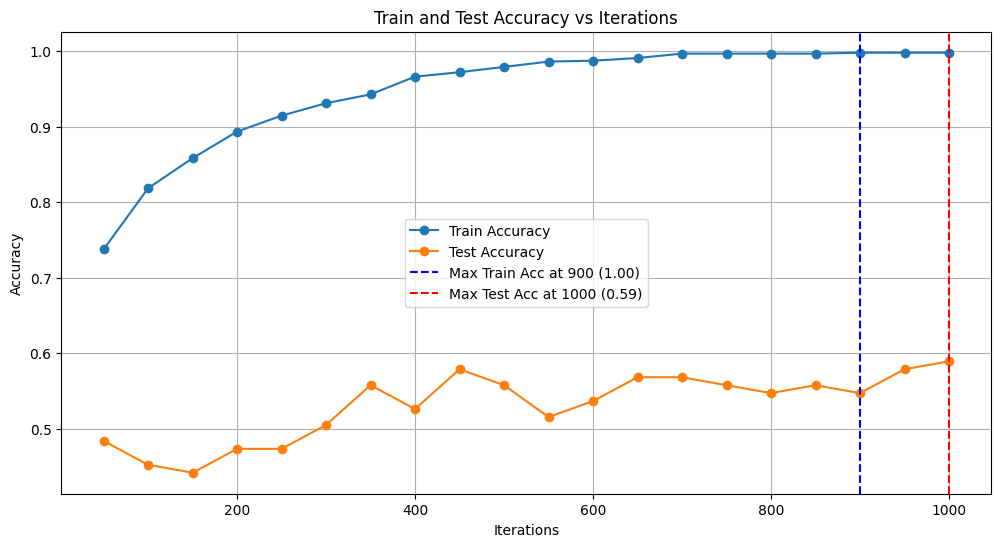

In [40]:
iterations = list(range(50, 1050, 50))
train_accuracies = []
test_accuracies = []

# Train the model for different iterations and collect accuracies
for it in iterations:
    cat_model = CatBoostClassifier(iterations=it, learning_rate=0.5, depth=1, verbose=0, random_state=42)
    cat_results = evaluate_model(cat_model)
    train_accuracies.append(cat_results['train_accuracy'])
    test_accuracies.append(cat_results['test_accuracy'])

# Find the maximum accuracies and their respective iterations
max_train_acc = max(train_accuracies)
max_test_acc = max(test_accuracies)
max_train_iter = iterations[train_accuracies.index(max_train_acc)]
max_test_iter = iterations[test_accuracies.index(max_test_acc)]

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')
plt.axvline(x=max_train_iter, linestyle='--', color='blue', label=f'Max Train Acc at {max_train_iter} ({max_train_acc:.2f})')
plt.axvline(x=max_test_iter, linestyle='--', color='red', label=f'Max Test Acc at {max_test_iter} ({max_test_acc:.2f})')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

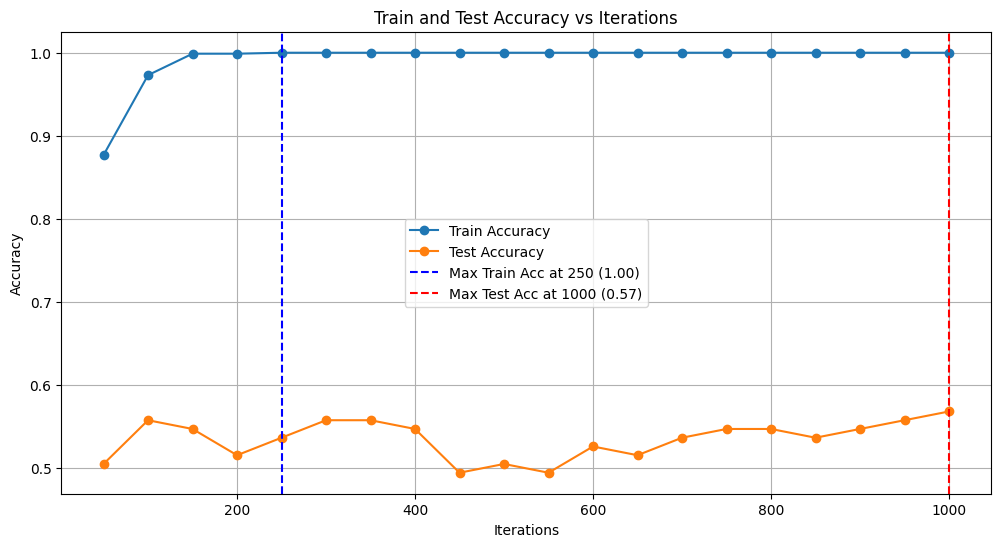

In [41]:
iterations = list(range(50, 1050, 50))
train_accuracies = []
test_accuracies = []

# Train the model for different iterations and collect accuracies
for it in iterations:
    cat_model = CatBoostClassifier(iterations=it, learning_rate=0.5, depth=2, verbose=0, random_state=42)
    cat_results = evaluate_model(cat_model)
    train_accuracies.append(cat_results['train_accuracy'])
    test_accuracies.append(cat_results['test_accuracy'])

# Find the maximum accuracies and their respective iterations
max_train_acc = max(train_accuracies)
max_test_acc = max(test_accuracies)
max_train_iter = iterations[train_accuracies.index(max_train_acc)]
max_test_iter = iterations[test_accuracies.index(max_test_acc)]

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')
plt.axvline(x=max_train_iter, linestyle='--', color='blue', label=f'Max Train Acc at {max_train_iter} ({max_train_acc:.2f})')
plt.axvline(x=max_test_iter, linestyle='--', color='red', label=f'Max Test Acc at {max_test_iter} ({max_test_acc:.2f})')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Change to binary for binary classification
    'metric': 'binary_logloss',  # Change to binary_logloss for binary classification
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# Train the model with early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=100)]
)

# Predict and evaluate on training data
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration)
y_train_pred_binary = [1 if x > 0.5 else 0 for x in y_train_pred]
train_accuracy = accuracy_score(y_train, y_train_pred_binary)

# Predict and evaluate on testing data
y_test_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_test_pred_binary = [1 if x > 0.5 else 0 for x in y_test_pred]
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.674544	valid_1's binary_logloss: 0.696867
Training Accuracy: 0.7690504103165299
Testing Accuracy: 0.45263157894736844
